In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load data set using pandas

dogs = pd.read_csv('dog-data.csv')

print(len(dogs))

59


In [2]:
#outputs the number of rows and columns showing that we have 59 dog breeds and 7 features in the dataset
print(dogs.shape)

(59, 9)


In [3]:
#print the first 5 rows of the dataset
dogs.head()

,dog_label,dog_size,dog_breed,low_height_inch,high_height_inch,low_weight_lbs,high_weight_lbs,obedience,lifespan_years
0,1,small_dog,french_bulldog,10.5,11.4,17.3,27.55,30%,11
1,1,small_dog,french_bulldog,11.0,12.0,18.8,25.59,30%,12
2,1,small_dog,french_bulldog,11.2,11.9,23.8,28.00,30%,13
3,1,small_dog,french_bulldog,10.7,12.1,19.7,26.80,30%,14
4,1,small_dog,poodle,10.0,14.0,19.0,20.00,95%,12


In [4]:
#we have 3 dog size types
print(dogs['dog_size'].unique())

['small_dog' 'medium_dog' 'big_dog']


In [5]:
#output the dog sizes
print(dogs['dog_breed'].unique())

['french_bulldog' 'poodle' 'chihuahua' 'pomeranian' 'siberian_husky'
 'dalmatian' 'boxer' 'great_dane' 'saint_bernard' 'mastiff']


In [6]:
#print the number of each breed inside dog_size as small-medium-big dog
#we note that the data is more or less balanced

print(dogs.groupby('dog_size').size())

dog_size
big_dog       22
medium_dog    19
small_dog     18
dtype: int64


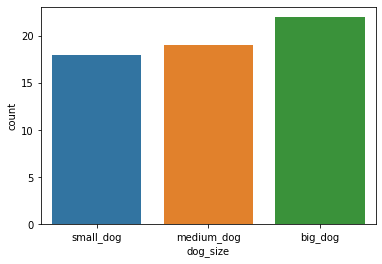

In [7]:
#seaborn is a library for statistical graphics producing informative plots
#visualize distribution of data to understand and explore it

import seaborn as sns
sns.countplot(dogs['dog_size'],label="Count")
plt.show()

In [9]:
#specify the feature columns
feature_names = ['low_height_inch', 'high_height_inch', 'low_weight_lbs', 'high_weight_lbs', 'obedience', 'lifespan_years']

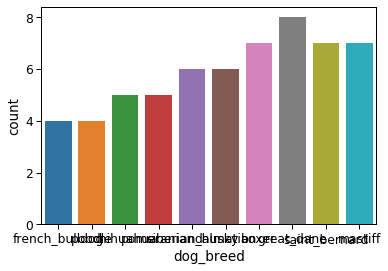

In [10]:
#visualize an informative plot on distribution of dog breeds
sns.set_context("paper", font_scale=1.4) #set the plotting context parameters but to be modified since the dog breeds are not readable
sns.countplot(dogs['dog_breed'],label="Count")
plt.show()

In [11]:
#column 'obedience' contains numeric values, but is formatted as object.Therefore, we need to convert it to numeric value (float).
#string method used to strip the right trailing percent sign (%).
#astype() used to convert to type float.
#assign new values back to the dogs dataframe, column 'obedience'
dogs['obedience'] = dogs['obedience'].str.rstrip('%').astype('float')

In [12]:
#display first 5 rows of dataset to check if percent sign has been removed.
dogs.head()

,dog_label,dog_size,dog_breed,low_height_inch,high_height_inch,low_weight_lbs,high_weight_lbs,obedience,lifespan_years
0,1,small_dog,french_bulldog,10.5,11.4,17.3,27.55,30.0,11
1,1,small_dog,french_bulldog,11.0,12.0,18.8,25.59,30.0,12
2,1,small_dog,french_bulldog,11.2,11.9,23.8,28.00,30.0,13
3,1,small_dog,french_bulldog,10.7,12.1,19.7,26.80,30.0,14
4,1,small_dog,poodle,10.0,14.0,19.0,20.00,95.0,12


In [13]:
#assign to X the feature columns and to y the label column from the dataset "dogs"
X = dogs[feature_names]
y = dogs['dog_label']

In [ ]:
#perform statistical analysis (min/max values; mean; count) to see if MinMaxScaler is necessary to be applied